In [7]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import codecs
import jieba.analyse
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# copy the opencc folder to the project you are developing.
from opencc import OpenCC

In [67]:
# convert from Simplified Chinese to Traditional Chinese
openCC = OpenCC('s2t')  
# can also set conversion by calling set_conversion
# openCC.set_conversion('s2tw')

with open('jaychou_lyrics.txt', 'r', encoding="utf-8") as file:
    converted = openCC.convert(file.read())
    converted = converted.replace("\n"," ")
    print(converted[:50])
    
    of = open('jaychou_lyrics_traditional.txt', 'w', encoding="utf-8")
    of.write(converted)

想要有直升機 想要和你飛到宇宙去 想要和你融化在一起 融化在宇宙裏 我每天每天每天在想想想想著你 這


In [68]:
JIEBA_DICTFILE_PATH = "D:/Program/model/jieba/dict.txt.big.txt"
FONT_FILE_PATH = "D:/Program/model/wordcloud/NotoSansCJKtc-Black.otf"

## 歌詞分析
歌詞分析主要用到的是 jieba.analyse.extract_tags，背後的原理為 tf-idf 算法。

### 1. tf - idf 簡介 ( term frequency–inverse document frequency )
tf-idf 是一種統計方法，此原理為評估一個字詞對於一個檔案集，或一個語料庫中的其中一份檔案的重要程度，這個概念十分重要。

* tf (term frequency )：詞頻，計算該詞語在文章所出現的次數
* idf ( inverse document frequency )：逆文檔頻率，衡量該字詞的重要性

![](https://imgur.com/FyjHT7I.png)

字詞的重要性隨著它在檔案中出現的次數成正比增加，但同時會隨著它在語料庫中出現的頻率成反比下降。也就是說，當 tf 值很高，而 df 值很低，這時得到的權重值就能夠把常見的關鍵字濾掉。詳細數學原理可參考[維基百科](https://zh.wikipedia.org/wiki/Tf-idf)。

In [69]:
# Set traditional Chinese dictionary
jieba.set_dictionary(JIEBA_DICTFILE_PATH)

# Extract the key word from the song "以父之名" 
song_lyrics = "In_The_Name_of_Father_lyrics.txt"

# convert the form of lyrics to one line
of = open('clean_lyrics.txt', 'w', encoding="utf-8")
of.write("")
of.close()

with open(song_lyrics, "r") as f:
    for lines in f.read():
        lines = lines.replace("\n"," ")
        
        of = open('clean_lyrics.txt', 'a', encoding="utf-8")
        of.write(lines)
of.close()        

In [70]:
clean_lyrics = "clean_lyrics.txt"

# topK represents the top few keywords to take
# tf-idf
with open(clean_lyrics, "r", encoding="utf-8") as f:
    for line in f:
        tags = jieba.analyse.extract_tags(line,topK=15, withWeight=True)
        for tag, weight in tags:
            print(tag + "," + str(int(weight * 10000)))

Building prefix dict from D:\Program\model\jieba\dict.txt.big.txt ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.u5f50f2b7ab381204f5f6032f217b280e.cache
Loading model cost 1.399 seconds.
Prefix dict has been built succesfully.


我們,1745
悲劇,1745
沈默,1745
畫面,1745
石板路,1615
有罪,1250
喊叫,1195
一直,997
晨露,964
沈醉,964
微涼,872
禮服,872
有霧,872
父在,872
低訴,872


In [82]:
# analyze lyrics of all songs
# get the top 70 key words

all_songs_lyrics = "jaychou_lyrics_traditional.txt"
top70_tags = []

with open(all_songs_lyrics, "r", encoding="utf-8") as f:
    for line in f:
        tags = jieba.analyse.extract_tags(line,70)
        top70_tags = tags
        print(",".join(tags))
f.close()

top70_tags_text = " ".join(top70_tags)

沒有,我們,怎麼,回憶,離開,什麼,已經,開始,這樣,過去,時間,一種,最後,還是,不會,一個,眼淚,愛情,永遠,無法,我會,可愛,因爲,感覺,爲什麼,別人,我用,忘記,微笑,記得,這個,畫面,哎喲,他們,知道,快樂,等待,溫柔,一場,還在,我要,麻煩,不用,難過,愛你,喜歡,變成,oh,不要,遠方,一點,安靜,這麼,想要,不能,感動,現在,簡單,飄移,一隻,身邊,媽媽,打開,不該,一直,美麗,原來,靈魂,雙截棍,也許


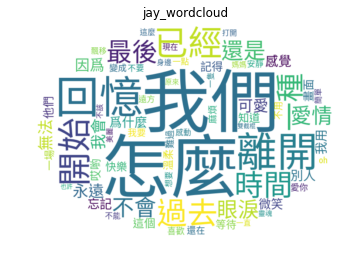

In [102]:
from PIL import Image
mask_use = "D:/Program/model/wordcloud/circle_mask.png"
mask = np.array(Image.open(mask_use))

# 設定停用字(排除常用詞、無法代表特殊意義的字詞)
stopwords = {}.fromkeys(["沒有","一個","什麼","那個","這樣"])

# 產生文字雲
wc = WordCloud(font_path=FONT_FILE_PATH, #設置字體
               background_color="white", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords ,     #停用字詞
               mask=mask)                # 決定圖片的形狀

wc.generate(top70_tags_text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("jay_wordcloud")
# plt.figure(figsize=(10,6), dpi = 100)
plt.savefig("wordcloud1.png", dpi = 700)
plt.show()

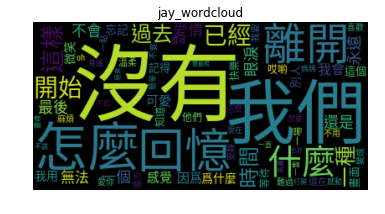

In [108]:
# Another style

FONT_FILE_PATH = "D:/Program/model/wordcloud/NotoSansMonoCJKtc-Regular.otf"

wordcloud = WordCloud(background_color="black", # 設定背景顏色
                      max_font_size=100, # 字體大小
                      font_path=FONT_FILE_PATH # 設定字型
                     )

wordcloud.generate(top70_tags_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("jay_wordcloud")
plt.axis("off")
plt.savefig("wordcloud2.png", dpi = 700)
plt.show()

# Reference:
https://github.com/youngmihuang/lyrics_application